In [3]:
# Importing libraries

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from xgboost import XGBClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# Read Datasets

In [4]:
df_train = pd.read_csv("fraudTrain.csv")
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
df_train.size

29823525

In [6]:
df_test = pd.read_csv("fraudTest.csv")
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [7]:
df_test.size

12781537

# Data Cleansing and Transformation

In [8]:
# Combining the train and test datasets for data cleaning and data visulization
df_fraud = pd.concat([df_train, df_test], axis = 0)
df_fraud.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [9]:
df_fraud.size

42605062

In [10]:
# Checking for duplicate values
df_fraud.duplicated().sum()

0

In [11]:
# Checking for null values
df_fraud.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [12]:
#As we have unnamed column and doesnt add value to analysis, I will be dropping that column
df_fraud = df_fraud.drop(['Unnamed: 0'], axis = 1)
df_fraud.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [13]:
df_fraud.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


# Data Visualizations

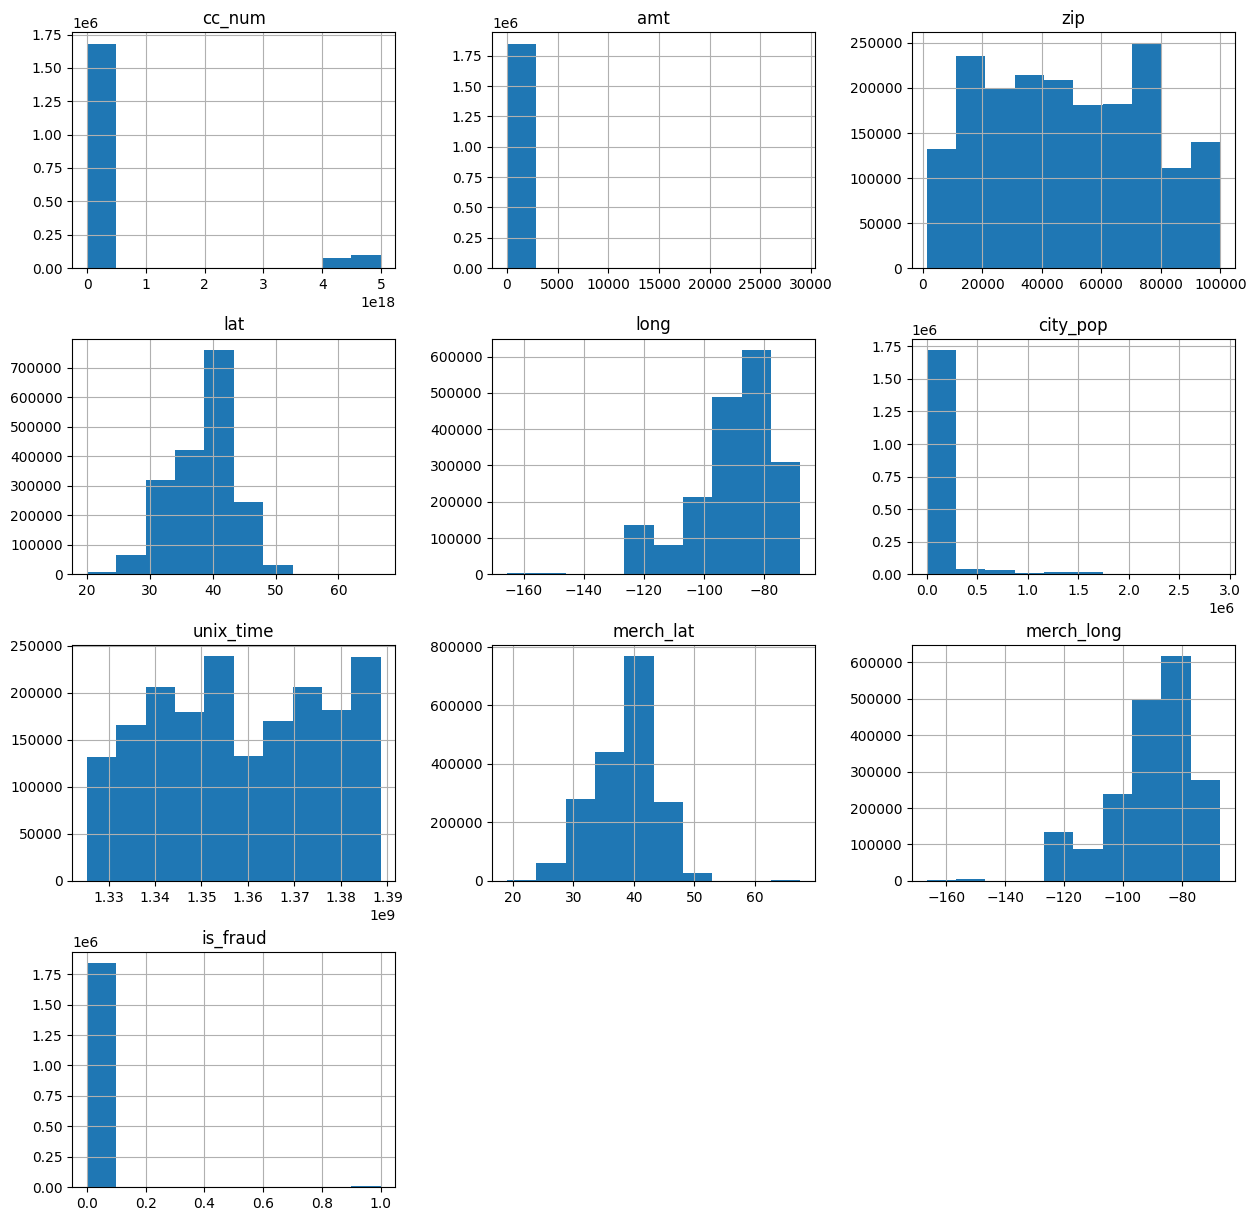

In [14]:
# Now let us see how all the columns are distributed
df_fraud.hist(figsize = (15,15))
plt.show()

[Text(0.5, 1.0, 'Fraud vs Gender')]

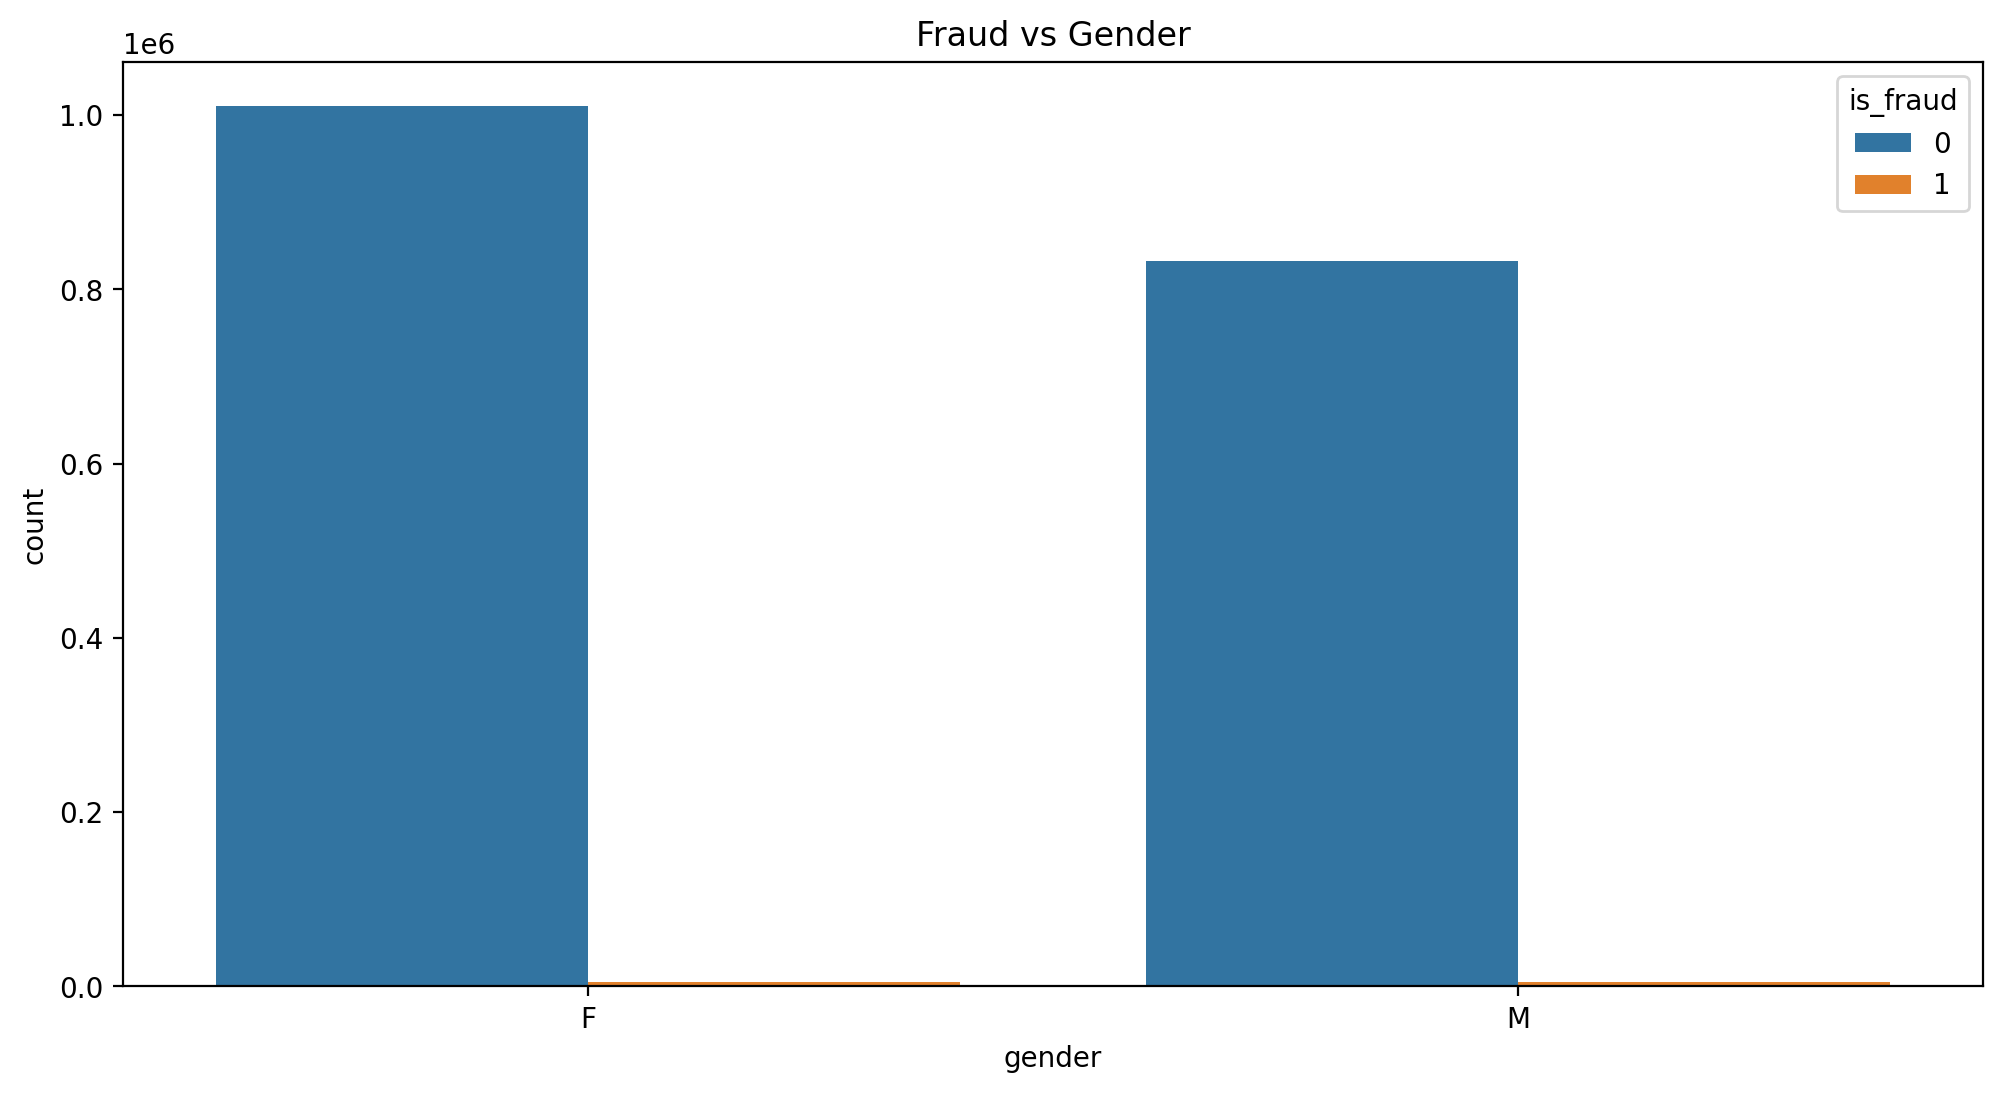

In [15]:
# Fraud vs Gender
plt.figure(figsize = (12,6), dpi = 200)
sns.countplot(x = 'gender', hue = 'is_fraud', data = df_fraud).set(title='Fraud vs Gender')

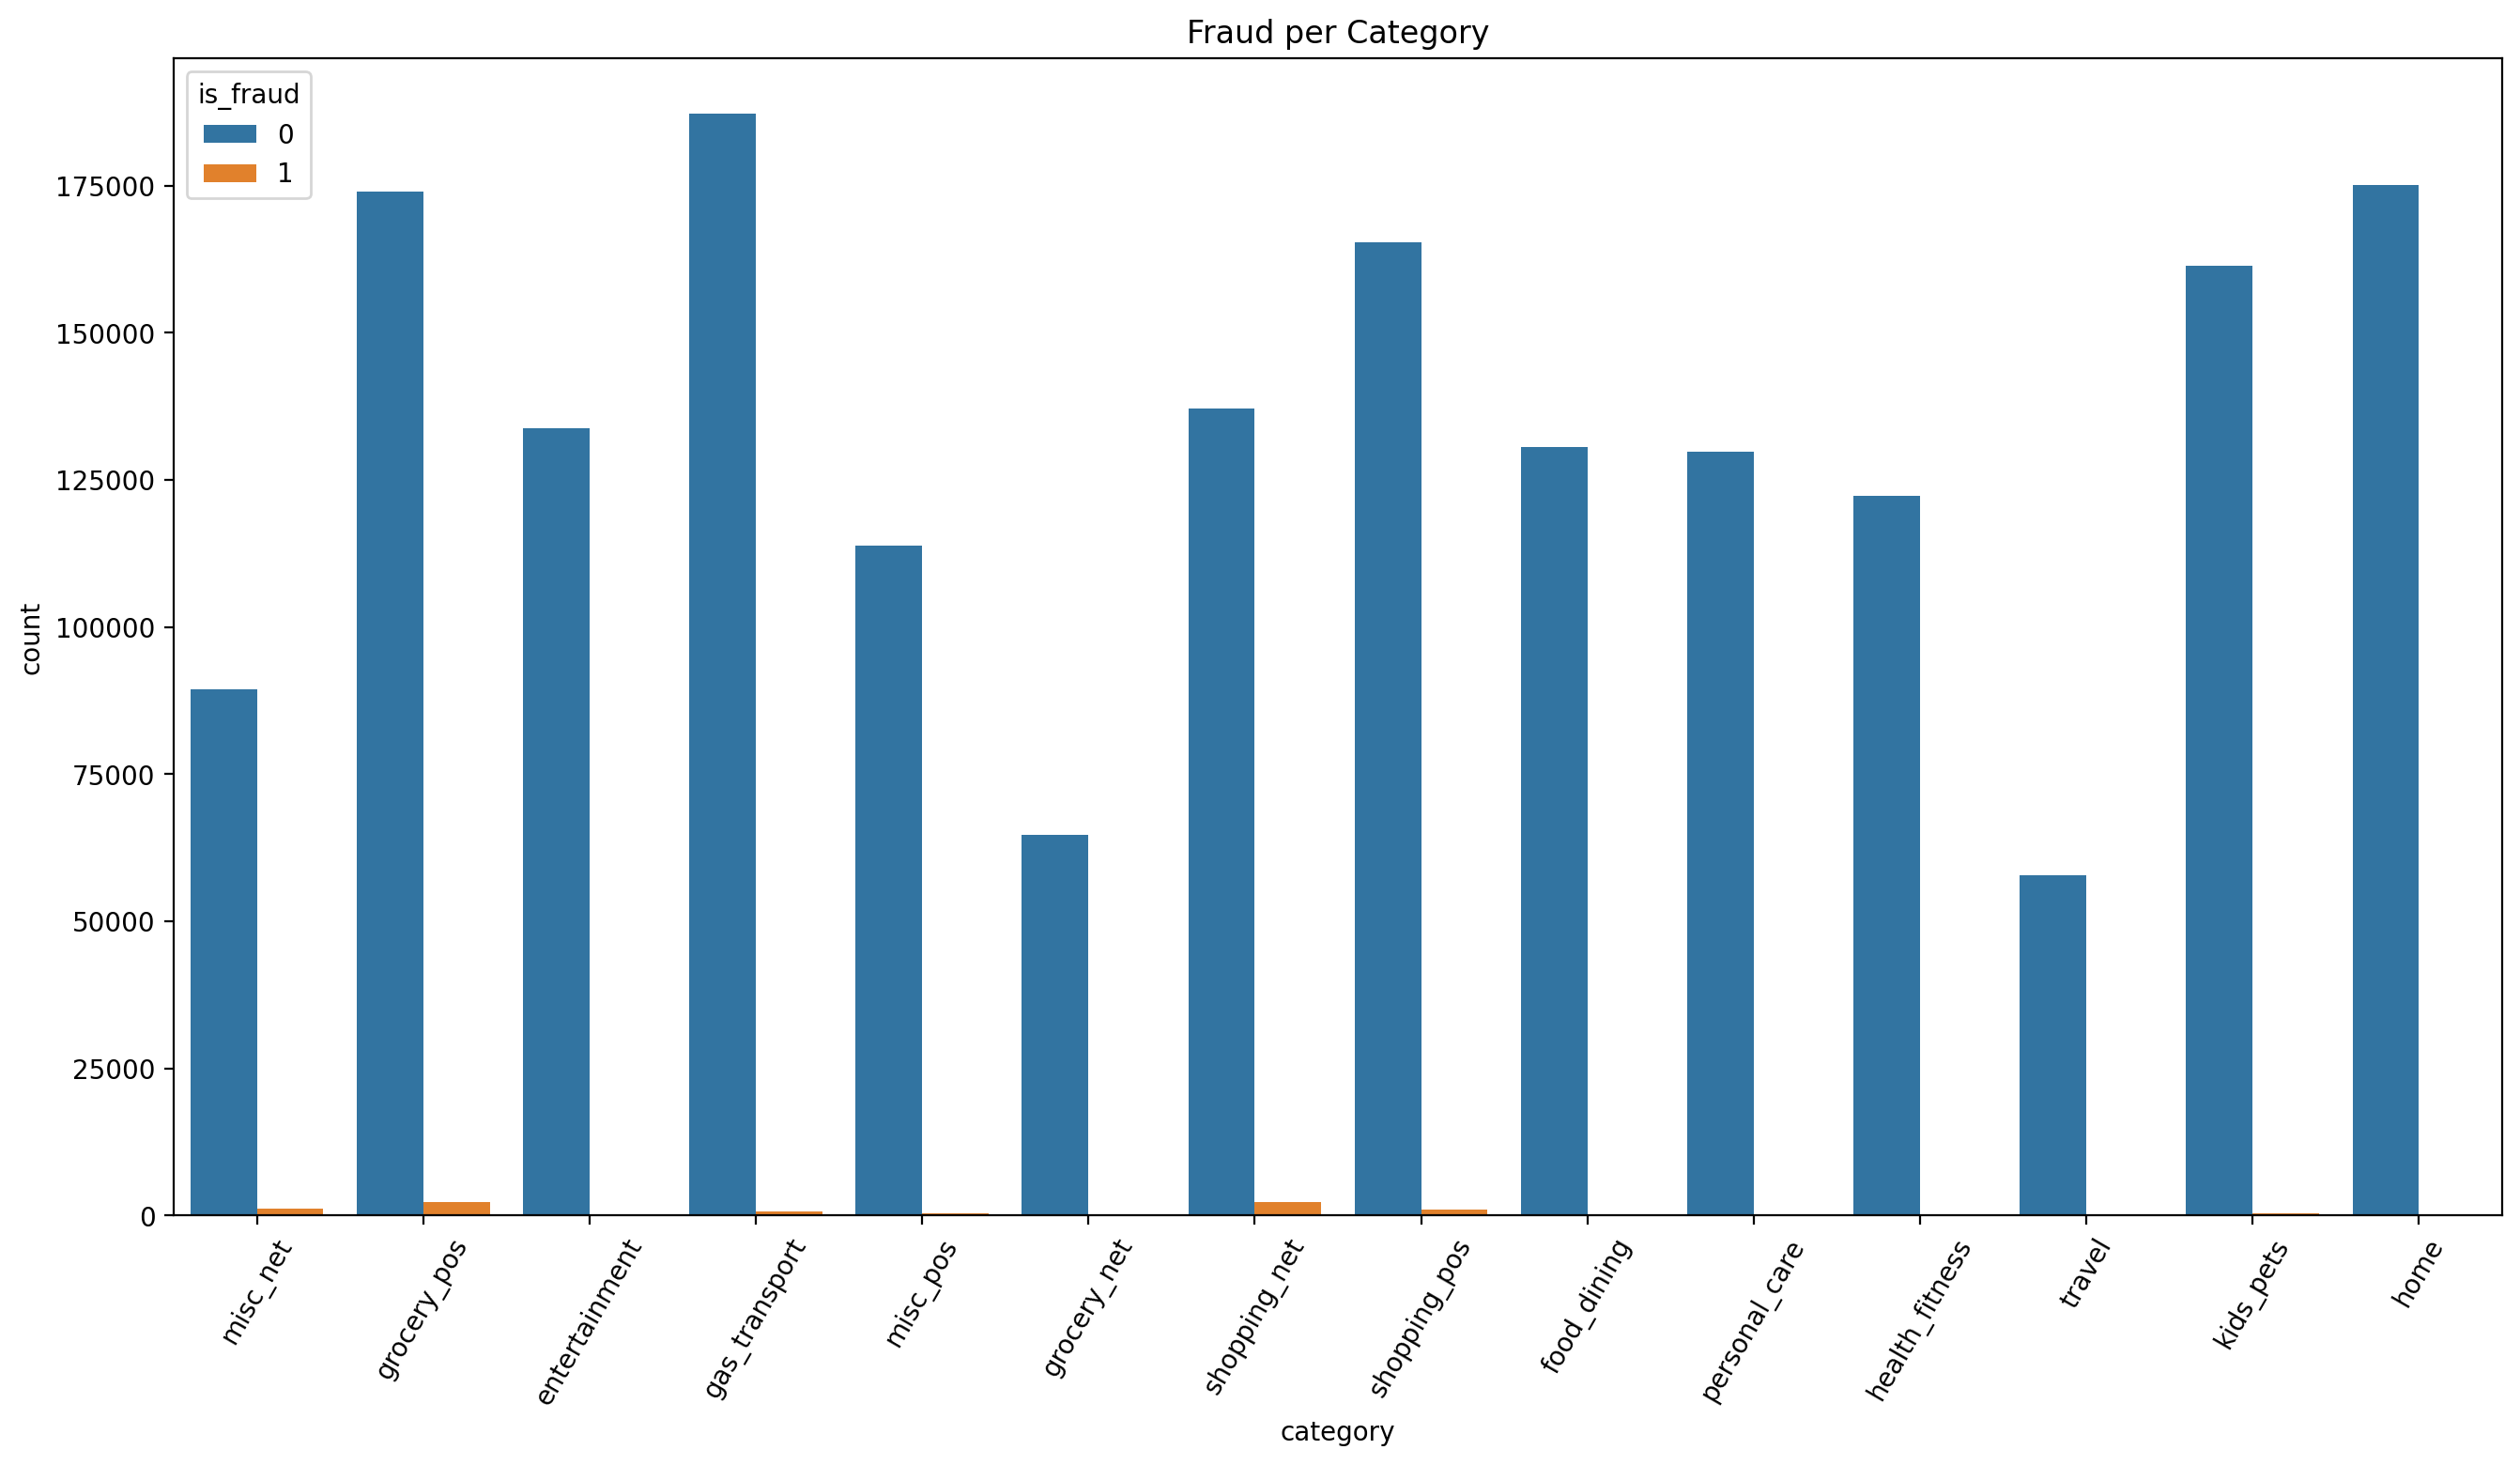

In [16]:
plt.figure(figsize = (16, 8), dpi = 200)
sns.countplot(x = 'category', hue = 'is_fraud', data = df_fraud).set(title='Fraud per Category')
plt.xticks(rotation = 60)
plt.show()

In [17]:
# Creating dependent and independent features dataset
X = df_fraud.drop(['is_fraud'], axis = 1)
Y = df_fraud['is_fraud']

In [18]:
X.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459


In [19]:
# Encoding the categorical columns
from sklearn.preprocessing import OrdinalEncoder
cols = ['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
        'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num']
encoder = OrdinalEncoder()
X[cols] = encoder.fit_transform(X[cols])

In [20]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [21]:
Y = df_fraud[['is_fraud']].values

In [22]:
print('Independent Features Shape : ' , X.shape)
print('Dependent Features Shape   : ',Y.shape)

Independent Features Shape :  (1852394, 21)
Dependent Features Shape   :  (1852394, 1)


# Split data into Train and Test sets

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [24]:
print('x_train Data Shape   : ', x_train.shape)
print('y_train Labels Shape : ', y_train.shape)
print('x_test Data Shape    : ', x_test.shape)
print('y_test Labels Shape  : ', y_test.shape)

x_train Data Shape   :  (1481915, 21)
y_train Labels Shape :  (1481915, 1)
x_test Data Shape    :  (370479, 21)
y_test Labels Shape  :  (370479, 1)


In [25]:
from imblearn.over_sampling import SMOTE
method= SMOTE()
x_sampled, y_sampled = method.fit_resample(x_train, y_train)

print('Data   : ', x_sampled.shape)
print('Labels : ', y_sampled.shape)

Data   :  (2948428, 21)
Labels :  (2948428,)


# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier.fit(x_sampled,y_sampled)

LogisticRegression()

In [25]:
# Prediction on training and testing sets and checking their accuracy scores
lr_predicted  = lr_classifier.predict(x_test)

In [26]:
lr_accuracy_score = accuracy_score(y_test, lr_predicted)
lr_accuracy_percent = lr_accuracy_score*100

In [27]:
print('Accuracy Score of the Logistic Regression model is {}'.format(lr_accuracy_score))
print('Accuracy Percentage of the Logistic Regression model is {} %'.format(round(lr_accuracy_percent, 2)))

Accuracy Score of the Logistic Regression model is 0.9489471737939262
Accuracy Percentage of the Logistic Regression model is 94.89 %


In [28]:
print('Classification report for Logistic Regression model:\n', classification_report(y_test, lr_predicted))
lr_conf_mat = confusion_matrix(y_true=y_test, y_pred=lr_predicted)
print('Confusion matrix for Logistic Regression model:\n', lr_conf_mat)

Classification report for Logistic Regression model:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97    368529
           1       0.07      0.76      0.14      1950

    accuracy                           0.95    370479
   macro avg       0.54      0.86      0.55    370479
weighted avg       0.99      0.95      0.97    370479

Confusion matrix for Logistic Regression model:
 [[350080  18449]
 [   465   1485]]


# Random Forest

In [29]:
rf_model = RandomForestClassifier(random_state=42, max_depth = 6)
rf_model.fit(x_sampled,y_sampled)
rf_predicted=rf_model.predict(x_test)

In [30]:
rf_accuracy_score = accuracy_score(y_test, rf_predicted)
rf_accuracy_percent = rf_accuracy_score*100

In [31]:
print('Accuracy Score of the Random Forest model is {}'.format(rf_accuracy_score))
print('Accuracy Percentage of the Random Forest model is {} %'.format(round(rf_accuracy_percent, 2)))

Accuracy Score of the Random Forest model is 0.9595847537917129
Accuracy Percentage of the Random Forest model is 95.96 %


In [32]:
print('Classification report for Random Forest model:\n', classification_report(y_test, rf_predicted))
rf_conf_mat = confusion_matrix(y_true=y_test, y_pred=rf_predicted)
print('Confusion matrix for Random Forest model:\n', rf_conf_mat)

Classification report for Random Forest model:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98    368529
           1       0.09      0.76      0.17      1950

    accuracy                           0.96    370479
   macro avg       0.55      0.86      0.57    370479
weighted avg       0.99      0.96      0.98    370479

Confusion matrix for Random Forest model:
 [[354019  14510]
 [   463   1487]]


# Decision Tree

In [33]:
dt_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
dt_model.fit(x_sampled,y_sampled)
dt_predicted = dt_model.predict(x_test)

In [34]:
dt_accuracy_score = accuracy_score(y_test, dt_predicted)
dt_accuracy_percent = dt_accuracy_score*100

In [35]:
print('Accuracy Score of the Decision Tree model is {}'.format(dt_accuracy_score))
print('Accuracy Percentage of the Decision Tree model is {} %'.format(round(dt_accuracy_percent, 2)))

Accuracy Score of the Decision Tree model is 0.9670777560941376
Accuracy Percentage of the Decision Tree model is 96.71 %


In [36]:
print('Classification report for Decision Tree model:\n', classification_report(y_test, dt_predicted))
dt_conf_mat = confusion_matrix(y_true=y_test, y_pred=dt_predicted)
print('Confusion matrix for Decision Tree model:\n', dt_conf_mat)

Classification report for Decision Tree model:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98    368529
           1       0.11      0.76      0.20      1950

    accuracy                           0.97    370479
   macro avg       0.56      0.86      0.59    370479
weighted avg       0.99      0.97      0.98    370479

Confusion matrix for Decision Tree model:
 [[356799  11730]
 [   467   1483]]


# XGBoost

In [38]:
xgb_model = XGBClassifier(max_depth = 4)
xgb_model.fit(x_sampled,y_sampled)
xgb_predicted = xgb_model.predict(x_test)

In [39]:
xgb_accuracy_score = accuracy_score(y_test, xgb_predicted)
xgb_accuracy_percent = xgb_accuracy_score*100

In [40]:
print('Accuracy Score of the XGBoost model is {}'.format(xgb_accuracy_score))
print('Accuracy Percentage of the XGBoost model is {} %'.format(round(xgb_accuracy_percent, 2)))

Accuracy Score of the XGBoost model is 0.9956461769762929
Accuracy Percentage of the XGBoost model is 99.56 %


In [41]:
print('Classification report for XGBoost model:\n', classification_report(y_test, xgb_predicted))
xgb_conf_mat = confusion_matrix(y_true=y_test, y_pred=xgb_predicted)
print('Confusion matrix for XGBoost model:\n', xgb_conf_mat)

Classification report for XGBoost model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368529
           1       0.56      0.84      0.67      1950

    accuracy                           1.00    370479
   macro avg       0.78      0.92      0.83    370479
weighted avg       1.00      1.00      1.00    370479

Confusion matrix for XGBoost model:
 [[367227   1302]
 [   311   1639]]


In [43]:
# import module
from tabulate import tabulate
 
# assign data
mydata = [
    ["Accuracy Score ", round(lr_accuracy_percent, 2),round(rf_accuracy_percent, 2),round(dt_accuracy_percent, 2),round(xgb_accuracy_percent, 2)],
]
 
# create header
head = ["", "Logistic Regression", "Random Forest", "Decision Tree Classifier", "XGBoost"]
 
# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))

+----------------+-----------------------+-----------------+----------------------------+-----------+
|                |   Logistic Regression |   Random Forest |   Decision Tree Classifier |   XGBoost |
+================+=======================+=================+============================+===========+
| Accuracy Score |                 94.89 |           95.96 |                      96.71 |     99.56 |
+----------------+-----------------------+-----------------+----------------------------+-----------+
